# Jobsheet 02 - Regression

Isikan identitas berikut
NIM:
Nama:
Kelas:

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [1]:
# import package
import numpy as np
import pandas as pd

In [2]:
# baca data
data = pd.read_csv('lagu_tidakpopuler.csv')
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.530,0.770,4,-6.633,0,0.0389,0.284,0.501000,0.744,0.623,120.144,225696,False,2,No Regrets,James Reeder,6f2c4a9lNx8aowZJngv7cJ
1,0.565,0.730,1,-6.063,1,0.0730,0.365,0.000000,0.237,0.511,130.026,158093,False,2,Wild Life,James Reeder,3fTs52jsDzSuVLsifxNKO8
2,0.427,0.546,4,-8.727,1,0.0849,0.539,0.015200,0.368,0.435,78.345,167262,False,2,Fangs,James Reeder,6NPafqavrv0icaIHMQnXDy
3,0.421,0.531,7,-5.516,1,0.0262,0.706,0.000208,0.110,0.383,85.080,236832,False,2,Afterburner,James Reeder,3vGmhxveURgmlZStvo0uc1
4,0.537,0.804,8,-7.378,0,0.1570,0.379,0.000489,0.323,0.543,139.950,239400,False,2,Hellfire Rising,James Reeder,4O2qRbfCHzMMgfbw9DBdGf


In [3]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10877 entries, 0 to 10876
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      10877 non-null  float64
 1   energy            10877 non-null  float64
 2   key               10877 non-null  int64  
 3   loudness          10877 non-null  float64
 4   mode              10877 non-null  int64  
 5   speechiness       10877 non-null  float64
 6   acousticness      10877 non-null  float64
 7   instrumentalness  10877 non-null  float64
 8   liveness          10877 non-null  float64
 9   valence           10877 non-null  float64
 10  tempo             10877 non-null  float64
 11  duration_ms       10877 non-null  int64  
 12  explicit          10877 non-null  bool   
 13  popularity        10877 non-null  int64  
 14  track_name        10877 non-null  object 
 15  track_artist      10877 non-null  object 
 16  track_id          10877 non-null  object

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,1.087700e+04,10877.000000
mean,0.572519,0.549771,5.223315,-11.359059,0.640986,0.137965,0.354163,0.232943,0.212137,0.464579,117.827552,2.055782e+05,3.078974
std,0.203501,0.257469,3.620319,6.788808,0.479733,0.160087,0.340914,0.369040,0.190303,0.273150,31.193596,1.067631e+05,4.007018
min,0.000000,0.000020,0.000000,-51.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.693000e+03,0.000000
25%,0.442000,0.379000,2.000000,-13.796000,0.000000,0.038400,0.036500,0.000000,0.099300,0.238000,92.996000,1.511520e+05,1.000000
50%,0.602000,0.569000,5.000000,-9.450000,1.000000,0.058900,0.233000,0.000133,0.129000,0.468000,117.141000,1.975220e+05,2.000000
75%,0.730000,0.745000,9.000000,-6.726000,1.000000,0.188000,0.657000,0.517000,0.268000,0.685000,138.934000,2.444280e+05,3.000000
max,0.986000,1.000000,11.000000,3.108000,1.000000,0.962000,0.996000,1.000000,0.999000,0.995000,239.500000,3.637277e+06,18.000000


### Visualisasi Data

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


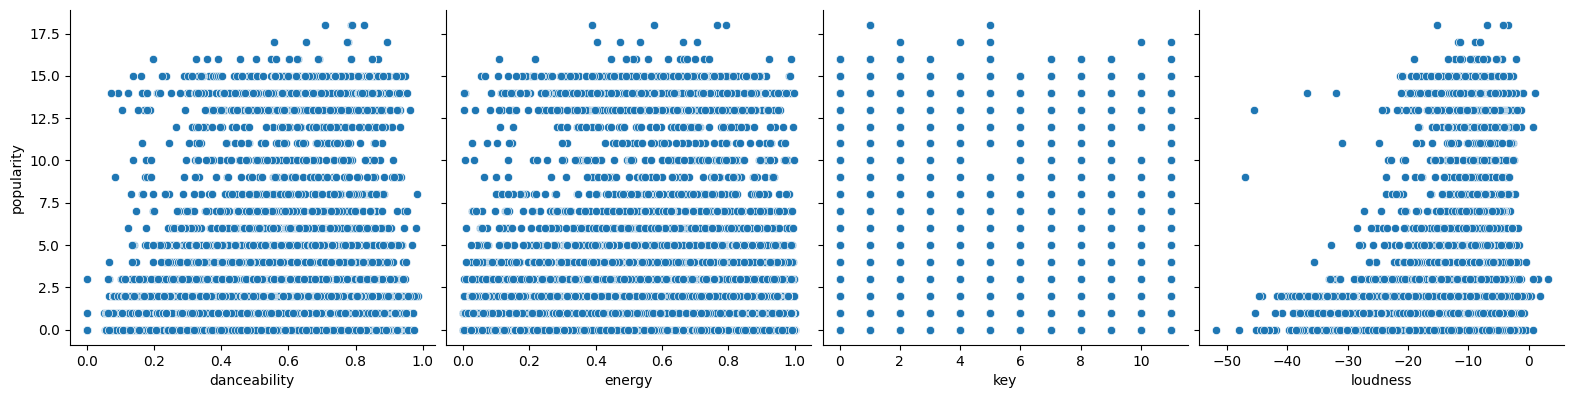

In [5]:
# operasi visualisasi
sns.pairplot(data, x_vars=['danceability', 'energy','key','loudness'], 
             y_vars='popularity', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

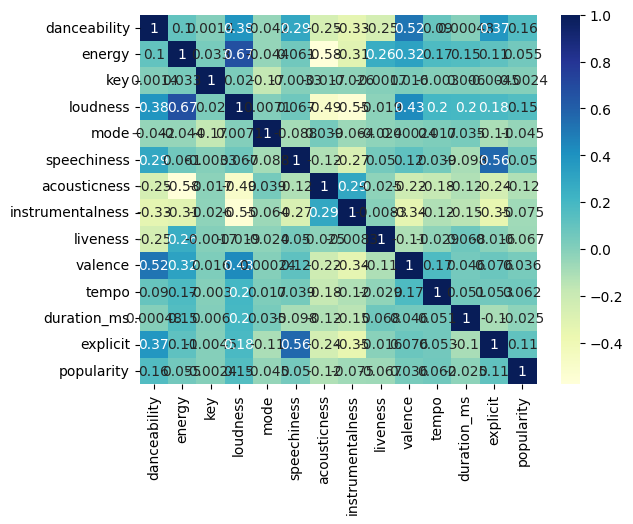

In [6]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [11]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['loudness']
y = data['popularity']

In [12]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [13]:
# hasil training dtaset
X_train
y_train

185      10
3252      8
8153      1
10267     0
7451      3
         ..
350       0
79        2
8039     14
6936      0
5640      1
Name: popularity, Length: 7613, dtype: int64

In [14]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [15]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const       4.061048
loudness    0.087008
dtype: float64

In [16]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           3.45e-39
Time:                        19:35:45   Log-Likelihood:                -21240.
No. Observations:                7613   AIC:                         4.248e+04
Df Residuals:                    7611   BIC:                         4.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0610      0.088     46.234      0.000       3.889       4.233
loudness       0.0870      0.007     13.171      0.000       0.074       0.100
==============================================================================
Omnibus:                     2502.151   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6316.633
Skew:                           1.845   Prob(JB):                         0.00
Kurtosis:                       5.511   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

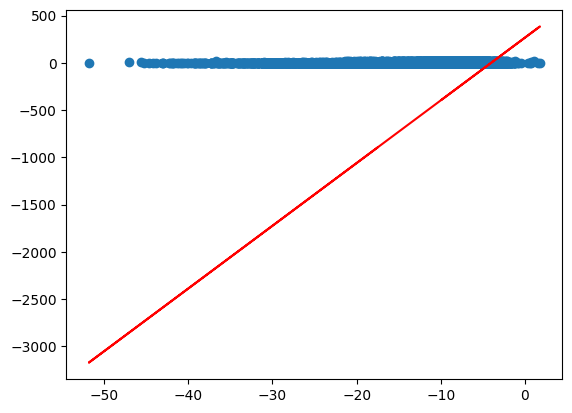

In [17]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [18]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\user\AppData\Local\Temp\ipykernel_11432\576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


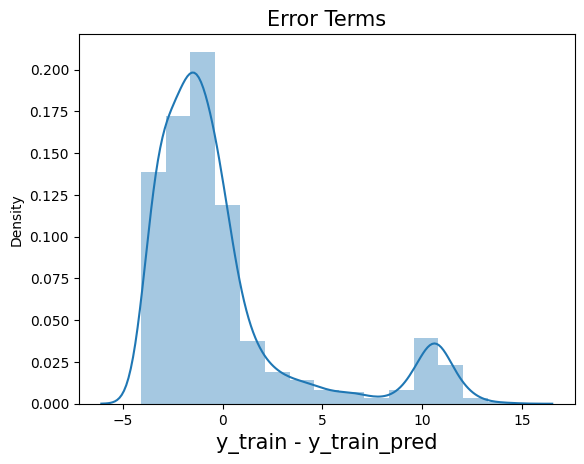

In [19]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

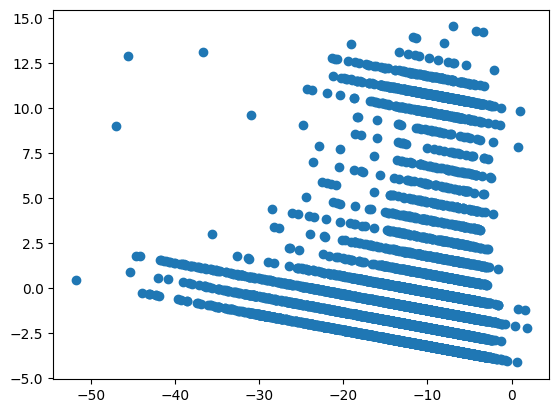

In [20]:
plt.scatter(X_train,res)
plt.show()

In [21]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

2432    3.337052
5258    3.560054
770     3.373943
5989    3.226290
3669    2.942034
dtype: float64

In [22]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.022856955560181302

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

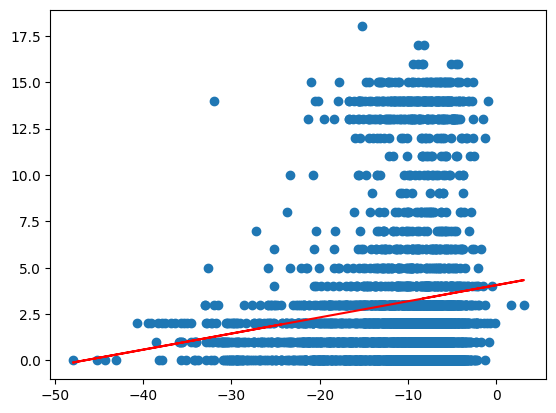

In [23]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()